<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_progetto_multiclassSVM_PCA_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/49hxl2m0y3sq6j2/features_PCA_20.zip?dl=0
!unzip features_PCA_20.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-01 16:00:31--  https://www.dropbox.com/s/49hxl2m0y3sq6j2/features_PCA_20.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/49hxl2m0y3sq6j2/features_PCA_20.zip [following]
--2022-05-01 16:00:32--  https://www.dropbox.com/s/raw/49hxl2m0y3sq6j2/features_PCA_20.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde2333c3112599261e5634608a.dl.dropboxusercontent.com/cd/0/inline/Bke04ccuzujJtM1skFG_INMtrlWit1LVMCDGIuv53k5uj9Kfn39T9RFeIhvKKAp4X6AB9xAgGEyQKfVNOe-gS4lhX0usXoX6kMU6U3IpygjHoXQlFAspg0PXau_WQgVdPB52VixPGeBKtjeIKFkDM9ubhskGjthFO8F1Wy4LkAlaAg/file# [following]
--2022-05-01 16:00:33--  https://ucde2333c3112599261e5634608a.dl.dropboxusercontent.com/cd/0/inline/Bke04ccuzujJtM1skFG_INMtrlWit1LVMCDGIuv

In [ ]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified
# Vengono usate le features trovate tramite PCA (primi 20 autovalori) da immagini jpg

import numpy as np

# 1. Carico in memoria il dataset
x_train = np.load('features_PCA_20/features_train_PCA_20.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_PCA_20/features_test_PCA_20.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [ ]:
print("np.shape(x_train): ")
print(np.shape(x_train))
print("np.shape(y_train): ")
print(np.shape(y_train))
print("np.shape(x_test): ")
print(np.shape(x_test))
print("np.shape(y_test): ")
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

np.shape(x_train): 
(31805, 20)
np.shape(y_train): 
(31805,)
np.shape(x_test): 
(7178, 20)
np.shape(y_test): 
(7178,)
[ -108.13089278 -1140.2339314   1050.58940216  -768.49120562
  1276.65597828   101.37985751  1489.87063473   219.72489337
  -272.18595812  -438.51233032  -151.26498981   289.4279884
   191.82437915    74.14208411   -22.40006549   177.829861
   300.10738803    63.99841203   137.92653633    40.42488002]
[2198.04836646 -968.78412255  759.01630239 -295.80490139 -189.39118722
  -88.90345817 -431.38225028  149.03225756  922.02387321  -93.04496657
  349.58407585 -139.82846243 -195.71393233   47.43885469  360.64594519
 -471.01450876 -401.67205453  272.34234162  292.00599361   24.62311986]
[0 0 0 ... 6 6 6]
[0 0 0 ... 6 6 6]


31805 20


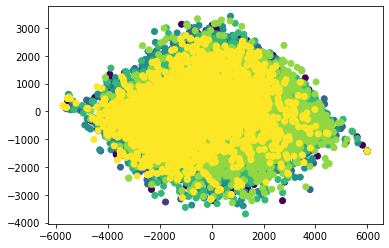

In [ ]:
# 2. Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [ ]:
from sklearn.svm import SVC

# 3. Inizializzo i parametri
kernel = 'poly'
degree = 4
gamma = 'scale'
probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovo'

max_iteration = 50

# 4. Inizializzo un modello di classificazione SVM per ognuna delle 7 classi
models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [ ]:
# 5. Addestro i modelli
for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Con

In [ ]:
# 6. Classifico i dati del testing set e costruisco la matrice di confusione
predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

print(np.shape(predicted_scores))
print(np.shape(predicted))
print(predicted_scores[:7])
print(predicted[:20])

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

for i in range(7):
  print('\n')
  for j in range(7):
    print(cmc[i][j])


(7, 7178)
(7178,)
[[0.13823379 0.13825672 0.13833818 ... 0.13824715 0.13822369 0.1384282 ]
 [0.05420062 0.05395086 0.05381868 ... 0.05349039 0.05028114 0.04622718]
 [0.14716699 0.14684424 0.14596267 ... 0.14707366 0.146794   0.14672989]
 ...
 [0.17551322 0.17486334 0.17468927 ... 0.17541787 0.17542725 0.17493031]
 [0.16151202 0.16162165 0.16427048 ... 0.16157792 0.16178767 0.16185885]
 [0.11930073 0.12155233 0.11627371 ... 0.11891701 0.118506   0.11419178]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


0.0
0.0
0.0
958.0
0.0
0.0
0.0


0.0
0.0
0.0
111.0
0.0
0.0
0.0


0.0
0.0
0.0
1024.0
0.0
0.0
0.0


0.0
0.0
0.0
1774.0
0.0
0.0
0.0


0.0
0.0
0.0
1233.0
0.0
0.0
0.0


0.0
0.0
0.0
1247.0
0.0
0.0
0.0


0.0
0.0
0.0
831.0
0.0
0.0
0.0


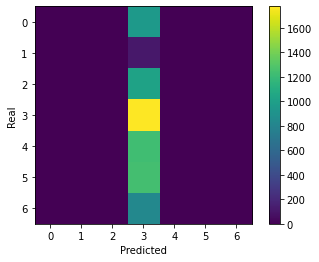

(7,)
(7,)
()
()
nan
nan
Accuratezza del classificatore: 24.71%
Precisione media del classificatore: nan
Recall media del classificatore: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
# 7. Faccio il plot della matrice di confusione e calcolo accuratezza, precision e recall media rispetto alle 7 classi
from matplotlib import pyplot as plt

plt.imshow(cmc)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1,2,3,4,5,6],["0","1","2","3","4","5","6"])
plt.yticks([0,1,2,3,4,5,6], ["0","1","2","3","4","5","6"])
plt.ylabel("Real")
plt.show()

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[:,i]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))